In [1]:
import numpy as np
from py_vlasov.wrapper import disp_det, oblique_wrapper
from py_vlasov.util import real_imag, list_to_complex, VlasovException
import scipy.optimize

Calculate dispersion relation for slow mode

In [2]:
k = 0.2
theta = 89.95
kp = k * np.sin(np.deg2rad(theta))
kz = k * np.cos(np.deg2rad(theta))
betap = .01
t_list=[1., 100.]
a_list=[1., 1.]
n_list=[1., 1.]
q_list=[1., -1.,]
m_list=[1., 1/1836,]
v_list=[0., 0.]

In [5]:
f = lambda wrel: real_imag(disp_det(list_to_complex(wrel), kz, kp, betap, t_list, a_list, n_list,
    q_list, m_list, v_list, method = 'numpy', aol=1e-4))
alfven = kz/np.sqrt(betap)
# guess = alfven * (1.5 - 0.02j)
# guess = alfven * (5. - 2.j)
# guess = alfven * (5-0.6) 
# guess = alfven * (0.15 - 0.06j)
guess = alfven * (0.38 - 0.002)
# guess = alfven * (0.08 - 0.15j)
# guess = alfven * (0.5 - 0.18j)
# guess = alfven * (1-.8j) * 1.2
wr, wi = scipy.optimize.fsolve(f, real_imag(guess))

normalized frequency $\bar{\omega}$

In [6]:
print(wr, wi)
print((wr, wi) / alfven)

0.000665719991607 -2.80563326172e-06
[ 0.38142951 -0.00160751]


calculate magnetic variance anisotropy

In [16]:
from py_vlasov.transport_ratios import input_gen, transport_ratios

In [17]:
wrel = wr + 1j * wi
inp = input_gen(wrel, kp, kz, betap, tetp = 1)

In [18]:
# setting print_result = True will print other 
# %debug
tr = transport_ratios(inp, print_result = False);

By definition
$$C_{bb} = \frac{|B_\parallel|^2}{|B_\perp|^2 \tan^2\theta}$$
$$ MVA = \frac{\langle|\delta B_\perp|^2\rangle}{\langle|\delta B_\parallel|^2\rangle} $$

In [19]:
cbb = tr['c_bb']
mva = 1/(cbb * np.tan(np.deg2rad(theta))**2)

In [20]:
tr

{'alfven_ratio': [1.3102680872241354e-12, 6.775617848375964e-16],
 'c_bb': 3.1980332607356217e-05,
 'compressibility': [4.9076848915867476e-11, 4.9080428093357557e-11],
 'cross_helicity': [-7.1771451252556165e-07, 1.5607307632801716e-08],
 'e_l_tot': 0.99999998098495313,
 'eigen_e': array([  6.91430183e+03 +2.45654161e+03j,
          0.00000000e+00 -1.00000000e+00j,   5.89863999e+00 +2.21807099e+00j]),
 'helicity': -0.26416587157482058,
 'kvec': array([  3.19515374e-05,   0.00000000e+00,   2.78829836e-08]),
 'p_b_b0': (-154.96001729481407+85.179876084505025j),
 'p_b_k': (-5.678965165359517-3.1216668500574114j),
 'p_e_b0': (-6914.3018317212018-2456.541607083604j),
 'parallel_compressibility': [(-4.722706333980243e-06+5.285977212098453e-06j),
  (-4.723022542647938e-06+5.2860413045593481e-06j)]}

$\beta = 1$, Alfven

- k = 0.1, MVA = 6697
- k = 0.2, MVA = 1719
- k = 0.4, MVA = 469
- k = 0.8, MVA = 162.8
- k = 1.2, MVA = 108
- k = 1.8, MVA = 86.4
- k = 2.0, MVA = 83.5
- k = 2.4, MVA = 79.4
- k = 3.6, MVA = 70
- k = 4, MVA = 66.4
- k = 6, MVA = 51.3
- k = 8, MVA = 38.7
- k = 10, MVA = 28.9
- k = 12, MVA = 21.7

$\beta = 1$, slow

- k = 0.1, MVA = 0.00599
- k = 0.2, MVA = 0.0238
- k = 0.4, MVA = 0.0904
- k = 0.8, MVA = 0.314
- k = 1.2, MVA = 0.665
- k = 1.8, MVA = 1.84
- k = 2.0, MVA = 2.55
- k = 2.4, MVA = 4.49
- k = 3.6, MVA = 11.1
- k = 4, MVA = 12.9
- k = 6, MVA = 17.
- k = 8, MVA = 15.6
- k = 10, MVA = 12.2
- k = 12, MVA = 9.11

In [467]:
k_arr = np.array([0.1, 0.2, 0.4, 0.8, 1.2, 1.8, 2.0, 2.4, 3.6, 4, 6, 8, 10, 12])
mva_alfven = np.array([6697, 1719, 469, 162.8, 108, 86.4, 83.5, 79.4, 70, 66.4, 51.3, 38.7, 28.9, 21.7])
mva_slow = np.array([0.006, 0.0238, 0.09, 0.314, 0.665, 1.84,  2.55, 4.49, 11.1, 12.9, 17, 15.6, 12.2, 9.11])

In [468]:
import matplotlib.pyplot as plt
%matplotlib inline

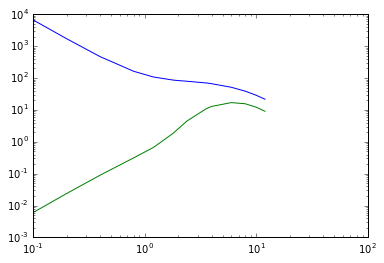

In [469]:
plt.plot(k_arr, mva_alfven)
plt.plot(k_arr, mva_slow)
plt.xscale('log')
plt.yscale('log')

In [470]:
def combine_mva(mva_alfven, mva_slow, as_ratio):
    bperp2_alfven = as_ratio * mva_alfven / (1 + mva_alfven)
    bpar2_alfven = as_ratio * 1 / (1 + mva_alfven)
    bperp2_slow = as_ratio * mva_slow / (1 + mva_slow)
    bpar2_slow = as_ratio * 1 / (1 + mva_slow)    
    return (bperp2_alfven+bperp2_slow) / (bpar2_alfven + bpar2_slow)

In [471]:
mva_combined_1 = []
for i in range(len(k_arr)):
    mva_combined_1.append(combine_mva(mva_alfven[i], mva_slow[i], 1))
# mva_combined_05 = []
# for i in range(len(k_arr)):
#     mva_combined_05.append(combine_mva(mva_alfven[i], mva_slow[i], 0.5))
# mva_combined_2 = []
# for i in range(len(k_arr)):
#     mva_combined_2.append(combine_mva(mva_alfven[i], mva_slow[i], 2))

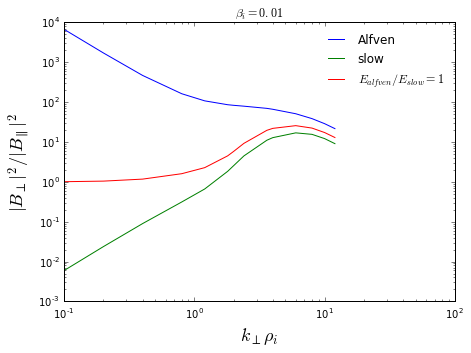

In [491]:
fig = plt.figure(figsize=[7, 5])
plt.plot(k_arr, mva_alfven, label = 'Alfven')
plt.plot(k_arr, mva_slow, label = 'slow')
plt.plot(k_arr, mva_combined_1, label = r'$E_{alfven}/E_{slow} = 1$')
# plt.plot(k_arr, mva_combined_05, label = 'E_{alfven}/E_{slow} = 0.5')
# plt.plot(k_arr, mva_combined_2, label = 'E_{alfven}/E_{slow} = 2')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best', frameon=False)
plt.ylabel(r'$|B_\perp|^2/|B_\parallel|^2$', fontsize=18)
plt.xlabel(r'$k_\perp \rho_i$', fontsize=18)
plt.title(r'$\beta_i = 0.01$')

fig.savefig('low_beta_hot_plasma_mva.png', dpi=200)

In [492]:
!mv low_beta_hot_plasma_mva.png figures/

In [494]:
print(mva_combined_1)

[1.0116978548757831, 1.0463819268507504, 1.174955953214885, 1.6070860132999021, 2.2798987936565314, 4.5012411347517727, 5.8137421919363987, 9.2781697520083828, 19.676293622141998, 22.046986469864699, 25.7823613086771, 22.411012433392543, 17.314617169373552, 12.989454434623591]
